In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Shree\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
train= pd.read_csv("UNSW_NB15_training-set.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
id                   175341 non-null int64
dur                  175341 non-null float64
proto                175341 non-null object
service              175341 non-null object
state                175341 non-null object
spkts                175341 non-null int64
dpkts                175341 non-null int64
sbytes               175341 non-null int64
dbytes               175341 non-null int64
rate                 175341 non-null float64
sttl                 175341 non-null int64
dttl                 175341 non-null int64
sload                175341 non-null float64
dload                175341 non-null float64
sloss                175341 non-null int64
dloss                175341 non-null int64
sinpkt               175341 non-null float64
dinpkt               175341 non-null float64
sjit                 175341 non-null float64
djit                 175341 non-null float64
swin      

In [4]:
y=train.attack_cat
train=train.drop("attack_cat",axis=1)

In [5]:
dummyy=pd.get_dummies(y,drop_first=True)

In [6]:
dummyy.head()

,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [7]:
y = dummyy

In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 9 columns):
Backdoor          175341 non-null uint8
DoS               175341 non-null uint8
Exploits          175341 non-null uint8
Fuzzers           175341 non-null uint8
Generic           175341 non-null uint8
Normal            175341 non-null uint8
Reconnaissance    175341 non-null uint8
Shellcode         175341 non-null uint8
Worms             175341 non-null uint8
dtypes: uint8(9)
memory usage: 1.5 MB


In [9]:
cat = train.select_dtypes(include=['object']).columns
name=[]
for i in cat:
    name.append(i)

In [10]:
non_cat=train.drop(name,axis=1)
cat_data=train.drop(non_cat,axis=1)
dummy=pd.get_dummies(cat_data,drop_first=True)

In [11]:
frame2=[dummy,non_cat]
Final=pd.concat(frame2,axis=1,sort=True)

In [12]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 0 to 175340
Columns: 192 entries, proto_a/n to is_sm_ips_ports
dtypes: float64(11), int64(29), uint8(152)
memory usage: 80.3 MB


In [13]:
train=Final

In [14]:
train.head()

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,0,0,0,1,6,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,1,3,0,0,0,2,6,0
3,0,0,0,0,0,0,0,0,0,0,...,2,1,1,3,1,1,0,2,1,0
4,0,0,0,0,0,0,0,0,0,0,...,2,2,1,40,0,0,0,2,39,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=0.30, random_state=42)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122738 entries, 159772 to 121958
Columns: 192 entries, proto_a/n to is_sm_ips_ports
dtypes: float64(11), int64(29), uint8(152)
memory usage: 56.2 MB


In [18]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122738 entries, 159772 to 121958
Data columns (total 9 columns):
Backdoor          122738 non-null uint8
DoS               122738 non-null uint8
Exploits          122738 non-null uint8
Fuzzers           122738 non-null uint8
Generic           122738 non-null uint8
Normal            122738 non-null uint8
Reconnaissance    122738 non-null uint8
Shellcode         122738 non-null uint8
Worms             122738 non-null uint8
dtypes: uint8(9)
memory usage: 2.0 MB


In [19]:
X_train.head()

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
159772,0,0,0,0,0,0,0,0,0,0,...,33,32,15,33,0,0,0,32,32,0
34227,0,0,0,0,0,0,0,0,0,0,...,3,1,1,4,0,0,0,2,4,0
165610,0,0,0,0,0,0,0,0,0,0,...,11,11,11,18,0,0,0,11,18,0
173132,0,0,0,0,0,0,0,0,0,0,...,16,16,8,39,0,0,0,16,39,0
158198,0,0,0,0,0,0,0,0,0,0,...,22,22,11,34,0,0,0,22,34,0


In [20]:
y_train.head()

,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
159772,0,0,0,0,1,0,0,0,0
34227,0,0,0,0,0,1,0,0,0
165610,0,0,0,0,1,0,0,0,0
173132,0,0,0,0,1,0,0,0,0
158198,0,0,0,0,1,0,0,0,0


In [21]:
y_test.head()

,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
15482,0,0,0,0,0,1,0,0,0
133349,0,0,0,0,1,0,0,0,0
80485,0,0,1,0,0,0,0,0,0
29972,0,0,0,0,0,1,0,0,0
18339,0,0,0,0,0,1,0,0,0


In [22]:
ypred = y_test

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Shree\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shree\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [24]:
# import keras

In [25]:
import keras

Using TensorFlow backend.


In [26]:
from keras.models import Sequential

In [27]:
from keras.layers import Dense, Activation

In [28]:
classifier = Sequential()

In [29]:
classifier.add(Dense(output_dim = 36, init = 'uniform', activation = 'relu', input_dim = 192))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=192, units=36, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [30]:
classifier.add(Dense(output_dim = 27, init = 'uniform', activation = 'relu'))

C:\Users\Shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=27, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [31]:
classifier.add(Dense(output_dim = 18, init = 'uniform', activation = 'relu'))

C:\Users\Shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=18, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [32]:
classifier.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu'))

C:\Users\Shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [33]:
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'softmax'))

C:\Users\Shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=9, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [34]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
# Fitting our model 
#sparse_categorical_crossentropy
classifier.fit(X_train, y_train, nb_epoch = 20)

Instructions for updating:
Use tf.cast instead.


C:\Users\Shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
122738/122738 [==============================] - 8s 66us/step - loss: 0.1270 - acc: 0.9479
Epoch 2/20
122738/122738 [==============================] - 7s 59us/step - loss: 0.0966 - acc: 0.9581
Epoch 3/20
122738/122738 [==============================] - 8s 62us/step - loss: 0.0918 - acc: 0.9605
Epoch 4/20
122738/122738 [==============================] - 8s 64us/step - loss: 0.0887 - acc: 0.9621
Epoch 5/20
122738/122738 [==============================] - 7s 61us/step - loss: 0.0868 - acc: 0.9629
Epoch 6/20
122738/122738 [==============================] - 7s 60us/step - loss: 0.0853 - acc: 0.9633
Epoch 7/20
122738/122738 [==============================] - 7s 61us/step - loss: 0.0843 - acc: 0.9638
Epoch 8/20
122738/122738 [==============================] - 7s 60us/step - loss: 0.0830 - acc: 0.9641
Epoch 9/20
122738/122738 [==============================] - 8s 61us/step - loss: 0.0817 - acc: 0.9645
Epoch 10/20
122738/122738 [==============================] - 7s 60us/step - loss: 

In [36]:
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)

In [37]:
y_pred

array([[3.1850802e-23, 1.8002334e-17, 9.3270548e-12, ..., 3.2920592e-22,
        2.5345352e-33, 3.4311855e-31],
       [2.0532770e-12, 2.5749802e-07, 6.5291539e-10, ..., 2.5302295e-06,
        0.0000000e+00, 3.5348801e-29],
       [4.4454664e-05, 7.0397798e-03, 9.5266744e-02, ..., 2.3830476e-05,
        1.1828676e-05, 1.3597206e-05],
       ...,
       [2.4209605e-03, 6.2441889e-02, 1.9798142e-01, ..., 2.9292770e-03,
        4.4353001e-02, 7.1808574e-04],
       [4.5250265e-13, 7.6625477e-11, 4.0222467e-06, ..., 2.0064410e-09,
        4.1783188e-18, 2.8562672e-17],
       [1.5493793e-02, 2.4334729e-02, 4.3885205e-02, ..., 1.0569216e-02,
        5.0760232e-02, 3.7476275e-05]], dtype=float32)

In [38]:
score = classifier.evaluate(X_test, y_test)

52603/52603 [==============================] - 1s 26us/step


In [39]:
classifier.metrics_names

['loss', 'acc']

In [40]:
score

[0.07627028482537228, 0.9662397675778642]

In [41]:
classifier.predict(X_train[50:51], batch_size=None,verbose=0,steps=None)

array([[8.8958386e-06, 4.0554862e-02, 9.5626706e-01, 2.3741813e-03,
        2.4018709e-04, 5.1857380e-04, 9.2248720e-06, 4.6936789e-15,
        2.7060529e-05]], dtype=float32)

In [42]:
y_train[50:51]

,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
128842,0,0,1,0,0,0,0,0,0


In [43]:
cof = classifier.predict(X_test[50:51], batch_size=None,verbose=0,steps=None)

In [44]:
auc=y_test[50:51]

In [45]:
y_test.head()

,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
15482,0,0,0,0,0,1,0,0,0
133349,0,0,0,0,1,0,0,0,0
80485,0,0,1,0,0,0,0,0,0
29972,0,0,0,0,0,1,0,0,0
18339,0,0,0,0,0,1,0,0,0


In [46]:
y_test.head()

,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
15482,0,0,0,0,0,1,0,0,0
133349,0,0,0,0,1,0,0,0,0
80485,0,0,1,0,0,0,0,0,0
29972,0,0,0,0,0,1,0,0,0
18339,0,0,0,0,0,1,0,0,0


In [47]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                6948      
_________________________________________________________________
dense_2 (Dense)              (None, 27)                999       
_________________________________________________________________
dense_3 (Dense)              (None, 18)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 117       
Total params: 8,796
Trainable params: 8,796
Non-trainable params: 0
_________________________________________________________________


In [48]:
# block diagram model of NN

In [49]:
from keras.utils.vis_utils import plot_model

In [50]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Train on 92053 samples, validate on 30685 samples
Epoch 1/10
92053/92053 [==============================] - 10s 114us/step - loss: 0.0785 - acc: 0.9652 - val_loss: 0.0759 - val_acc: 0.9663
Epoch 2/10
92053/92053 [==============================] - 10s 113us/step - loss: 0.0778 - acc: 0.9654 - val_loss: 0.0754 - val_acc: 0.9667
Epoch 3/10
92053/92053 [==============================] - 10s 111us/step - loss: 0.0776 - acc: 0.9655 - val_loss: 0.0773 - val_acc: 0.9657
Epoch 4/10
92053/92053 [==============================] - 10s 113us/step - loss: 0.0773 - acc: 0.9656 - val_loss: 0.0742 - val_acc: 0.9666
Epoch 5/10
92053/92053 [==============================] - 10s 113us/step - loss: 0.0766 - acc: 0.9660 - val_loss: 0.0749 - val_acc: 0.9666
Epoch 6/10
92053/92053 [==============================] - 10s 110us/step - loss: 0.0765 - acc: 0.9658 - val_loss: 0.0778 - val_acc: 0.9657
Epoch 7/10
92053/92053 [==============================] - 11s 117us/step - loss: 0.0763 - acc: 0.9658 - val_loss: 0.

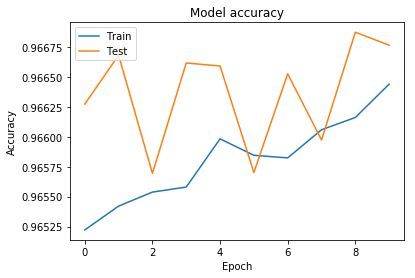

In [51]:
import matplotlib.pyplot as plt

history = classifier.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

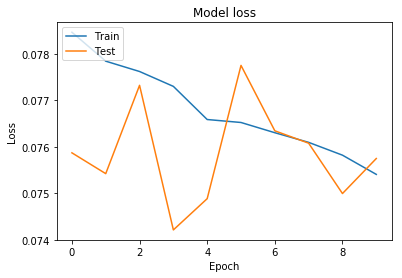

In [52]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
from keras.utils import plot_model
plot_model(classifier, to_file='models.png')

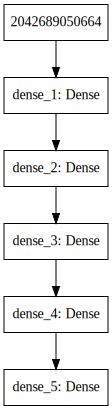

In [54]:
from IPython.display import SVG
#from keras.utils import model_to_dot
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

Train on 39452 samples, validate on 13151 samples
Epoch 1/10
39452/39452 [==============================] - 4s 109us/step - loss: 0.0762 - acc: 0.9664 - val_loss: 0.0752 - val_acc: 0.9672
Epoch 2/10
39452/39452 [==============================] - 4s 107us/step - loss: 0.0753 - acc: 0.9667 - val_loss: 0.0773 - val_acc: 0.9663
Epoch 3/10
39452/39452 [==============================] - 5s 116us/step - loss: 0.0749 - acc: 0.9670 - val_loss: 0.0779 - val_acc: 0.9654
Epoch 4/10
39452/39452 [==============================] - 4s 108us/step - loss: 0.0745 - acc: 0.9671 - val_loss: 0.0777 - val_acc: 0.9664
Epoch 5/10
39452/39452 [==============================] - 4s 110us/step - loss: 0.0744 - acc: 0.9672 - val_loss: 0.0771 - val_acc: 0.9655
Epoch 6/10
39452/39452 [==============================] - 4s 114us/step - loss: 0.0742 - acc: 0.9672 - val_loss: 0.0767 - val_acc: 0.9660
Epoch 7/10
39452/39452 [==============================] - 4s 108us/step - loss: 0.0740 - acc: 0.9676 - val_loss: 0.0774 - 

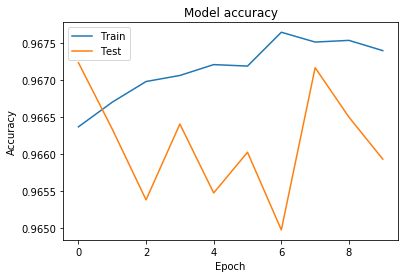

In [55]:

history = classifier.fit(X_test, y_test, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [56]:
y_test.head()

,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
15482,0,0,0,0,0,1,0,0,0
133349,0,0,0,0,1,0,0,0,0
80485,0,0,1,0,0,0,0,0,0
29972,0,0,0,0,0,1,0,0,0
18339,0,0,0,0,0,1,0,0,0


In [57]:
#from sklearn.metrics import confusion_matrix

In [58]:
#confusion_matrix(y_test, y_pred)

In [59]:
#import graphviz

In [62]:
from ann_visualizer.visualize import ann_viz;

In [63]:
#ann_viz(classifier, view=True, title = "Neural Network" )

In [64]:
#ann_viz(classifier, title="My first neural network")

In [65]:
classifier.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=10)

Train on 122738 samples, validate on 52603 samples
Epoch 1/10
122738/122738 [==============================] - 23s 191us/step - loss: 0.0764 - acc: 0.9662 - val_loss: 0.0739 - val_acc: 0.9672
Epoch 2/10
122738/122738 [==============================] - 24s 194us/step - loss: 0.0758 - acc: 0.9663 - val_loss: 0.0744 - val_acc: 0.9672
Epoch 3/10
122738/122738 [==============================] - 23s 191us/step - loss: 0.0754 - acc: 0.9664 - val_loss: 0.0771 - val_acc: 0.9661
Epoch 4/10
122738/122738 [==============================] - 24s 192us/step - loss: 0.0751 - acc: 0.9666 - val_loss: 0.0787 - val_acc: 0.9654
Epoch 5/10
122738/122738 [==============================] - 23s 191us/step - loss: 0.0747 - acc: 0.9667 - val_loss: 0.0742 - val_acc: 0.9671
Epoch 6/10
122738/122738 [==============================] - 24s 196us/step - loss: 0.0744 - acc: 0.9668 - val_loss: 0.0777 - val_acc: 0.9659
Epoch 7/10
122738/122738 [==============================] - 24s 194us/step - loss: 0.0741 - acc: 0.9670

In [ ]:
#from sklearn.model_selection import StratifiedKFold

In [ ]:
#p=Final

In [ ]:
#p.head()

In [ ]:
#q=dummyy

In [ ]:
#q.head()

In [ ]:
#from sklearn.preprocessing import StandardScaler
##sc = StandardScaler()
#p = sc.fit_transform(X_train)


In [ ]:
#seed=7

In [ ]:
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
#cvscores = []
#for train, test in kfold.split(p, q):
  # create model
	#model = Sequential()
	#model.add(Dense(36, input_dim=192, activation='relu'))
	#model.add(Dense(18, activation='relu'))
	#model.add(Dense(9, activation='softmax'))
	# Compile model
	#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	#model.fit(p[train], q[train], epochs=150, batch_size=10, verbose=0)
	# evaluate the model
	#scores = model.evaluate(p[test], q[test], verbose=0)
	#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	#cvscores.append(scores[1] * 100)
#print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [ ]:
### json_file.write(classifier_json)

In [ ]:
###print("Saved model to disk")

In [ ]:
#from ann_visualizer.visualize import ann_viz;
 #from keras.models import model_from_json

In [ ]:
 #load json and create model
#json_file = open('classifier.json', 'r')
#loaded_classifier_json = json_file.read()
#json_file.close()

In [ ]:
#classifier = classifier_from_json(loaded_classifier_json)

In [ ]:
 #load weights into new model
#classifier.load_weights("model.h5")

In [ ]:
#ann_viz(classifier, title="Artificial Neural network - Model Visualization")

In [ ]:
#from sklearn.metrics import confusion_matrix


In [ ]:

#confusion_matrix(y_pred, y_test )